<a href="https://colab.research.google.com/github/Masyithah28/PembelajaranMesin_Ganjil_2024/blob/main/Jobsheet7Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 7 - Clustering
Nama  : Masyithah Sophia Damayanti  
Kelas : TI - 3C     
NIM   : 2241720011  
No    : 15  
[Github](https://github.com/Masyithah28/PembelajaranMesin_Ganjil_2024/blob/main/Jobsheet7Clustering.ipynb)  
[Google Colab](https://colab.research.google.com/drive/1OtdakYbQkaypKmLjYC7EQUUMYx36dr8G?usp=sharing)


## Praktikum 1

### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Persiapan Data

In [ ]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving iris.csv to iris.csv


In [ ]:
#Load Data
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

Penjelasan:   
X memilih semua kolom kecuali yang pertama dan terakhir (fitur), sedangkan y memilih kolom terakhir (target).

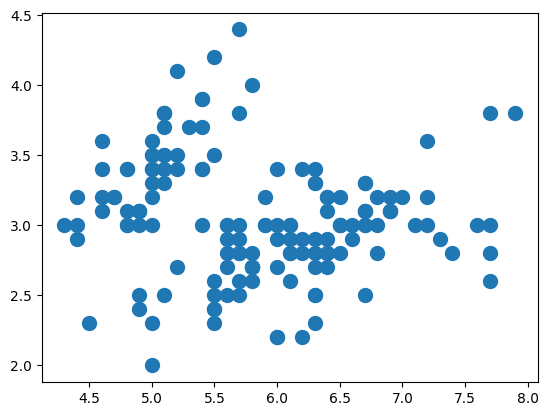

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

Penjelasan:   
Untuk membuat plot sebar (scatter plot) dari dua kolom pertama di X, dengan ukuran titik 100.

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

Penjelasan:     
Menggunakan model KMeans untuk mengelompokkan data menjadi 2 cluster (k=2), lalu menyesuaikan (fit) model dengan data X dan memprediksi cluster untuk setiap data, yang disimpan dalam y_kmeans.

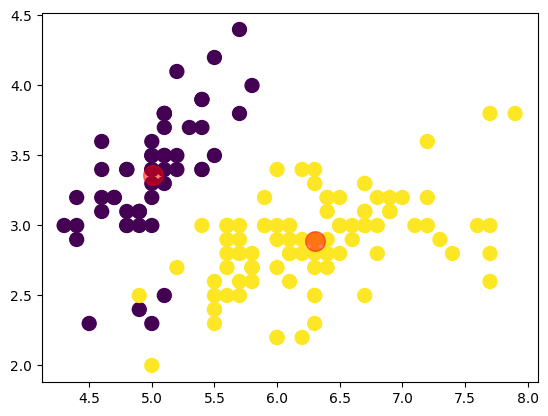

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Penjelasan:   
 untuk membuat scatter plot dengan hasil clustering berdasarkan dua fitur, dan menandai posisi centroid dengan titik merah besar.

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


Penjelasan:   
Menggunakan model KMeans yang menghasilkan seberapa baik cluster terbentuk (semakin kecil, semakin baik).

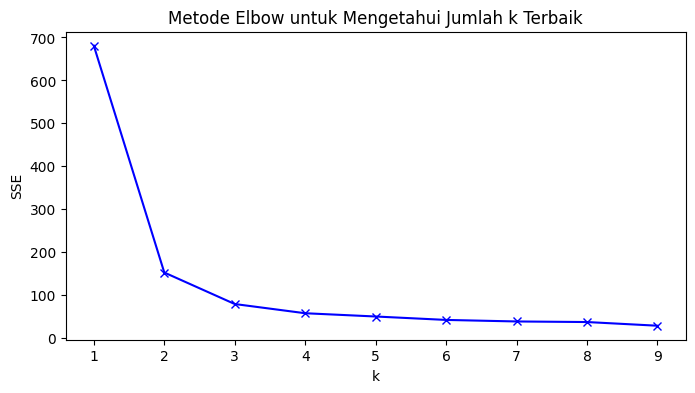

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

Penjelasan:   
1. Menghitung nilai SSE untuk setiap k dari 1 hingga 9.
2. Memplot grafik k versus SSE untuk melihat "elbow" (tikungan), yang menunjukkan jumlah cluster optimal.

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.4732732654949
k=5; SSE=49.876430957802604
k=6; SSE=41.904604545454546
k=7; SSE=38.32410368536129
k=8; SSE=36.973583754841606
k=9; SSE=28.393622818358125


## Praktikum 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

### Pengantar K-Means

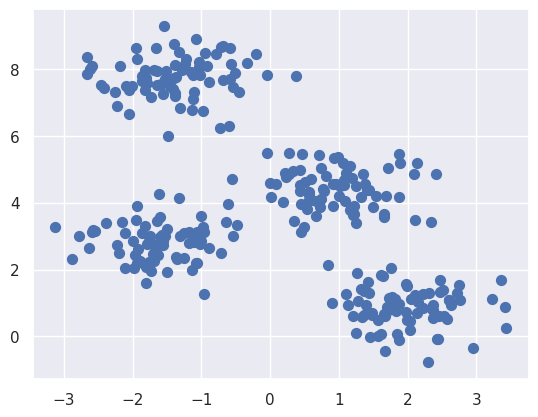

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Penjelasan:   
Menggunakan make_blobs untuk membuat dataset sintetik dengan 300 sampel dan 4 pusat cluster, lalu memplot data dalam bentuk scatter plot.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

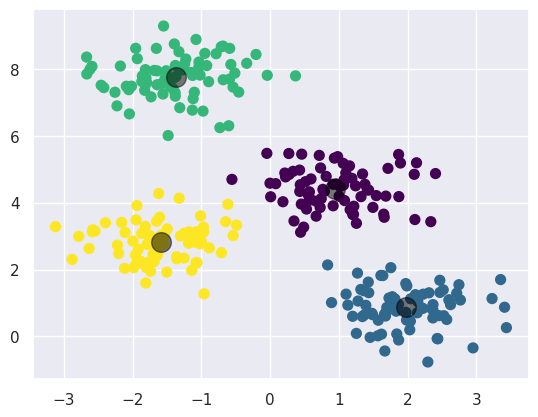

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Penjelasan:   
Membuat scatter plot untuk data X dengan warna berdasarkan hasil clustering (y_kmeans), dan menambahkan centroid cluster sebagai titik hitam besar dengan transparansi 50%.

### Algoritma Expaction-Maximization

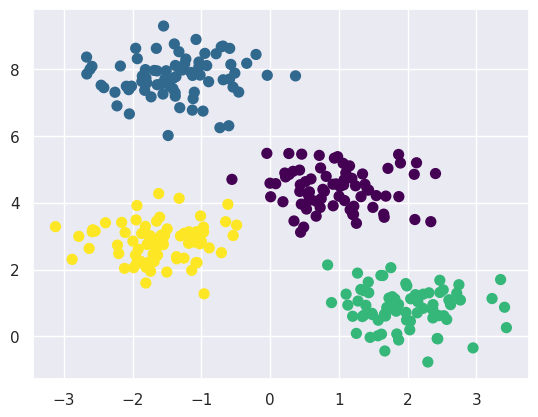

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Penjelasan:   
**find_clusters** berfungsi untuk mengelompokkan data X menjadi 4 cluster menggunakan pendekatan k-means:   
1. Memilih secara acak pusat cluster awal.
2. Menghitung label untuk setiap titik berdasarkan jarak ke pusat cluster.  
3. Memperbarui pusat cluster dengan rata-rata titik dalam setiap cluster.
4. Mengulangi langkah 2 dan 3 sampai pusat cluster konvergen.

Dan menghasilkan scatter plot untuk menampilkan data X berwarna berdasarkan label cluster yang dihasilkan

### Perubahan Random

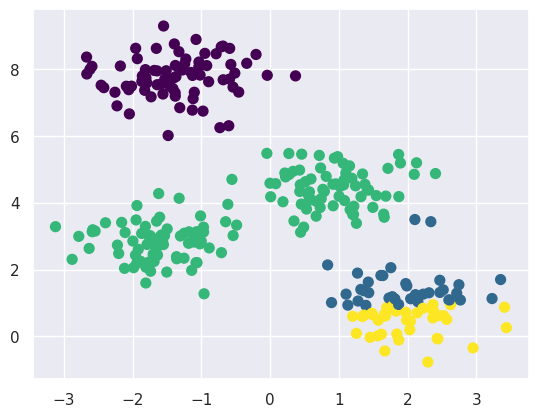

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

### Optimalisasi Jumlah Klaster

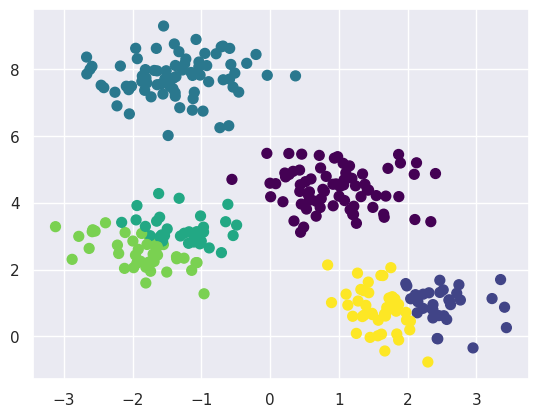

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Penjelasan:   
Menggunkan Model KMeans dengan 6 cluster pada data X, menyimpan label cluster yang dihasilkan dalam variabel labels, dan memplot hasil clustering sebagai scatter plot dengan warna berdasarkan label.


### Batas Klaster yang Tidak Selalu Linier

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

Penjelasan:   
Menggunakan fungsi make_moons untuk membuat dataset sintetik berbentuk dua bulan sabit dengan 200 sampel, dengan sedikit noise (kebisingan) sebesar 0.05, dan mengatur random_state untuk reproduksibilitas.

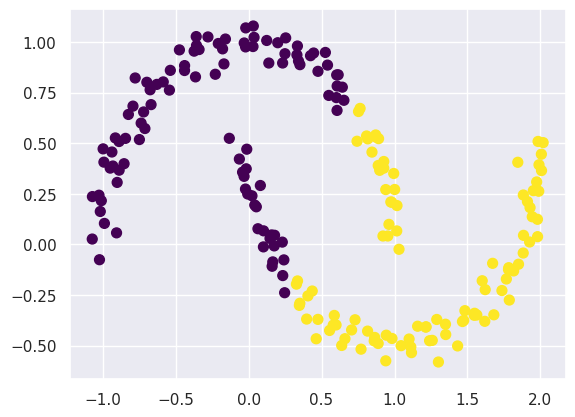

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Penjelasan:     
 Dengan model algoritma KMeans dengan 2 cluster pada data X, menyimpan label cluster yang dihasilkan dalam variabel labels, dan memplot hasil clustering sebagai scatter plot dengan warna berdasarkan label.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


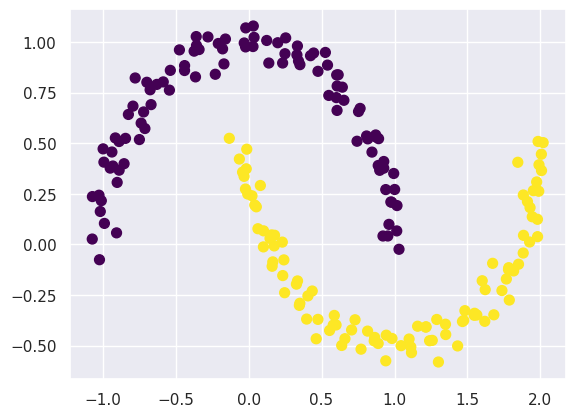

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Penjelasan:   
Menggunakan model algoritma Spectral Clustering dengan 2 cluster pada data X yaitu menggunakan kedekatan tetangga terdekat dan metode k-means untuk penugasan label, dengan memplot hasil clustering sebagai scatter plot dengan warna berdasarkan label yang dihasilkan.

### Contoh Kasus 1: Karakter Angka

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

Penjelasan:   
Mengambil 10 cluster data 'digits.data' dengan menyimpan hasil clustering dalam variabel clusters, dan memeriksa bentuk (dimensi) pusat cluster yang dihasilkan dengan 'kmeans.cluster_centers_'.

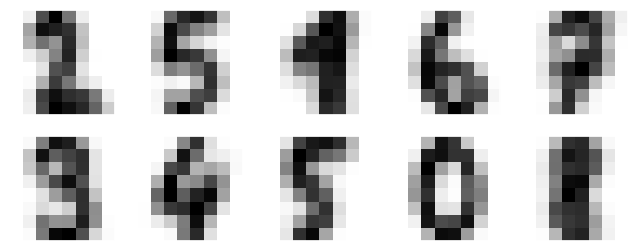

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Penjelasan:   
Membuat subplot untuk menampilkan 10 pusat cluster hasil K-Means, dengan setiap pusat cluster direshape menjadi ukuran 8x8. Setiap subplot tidak menampilkan ticks sumbu, dan pusat cluster ditampilkan menggunakan skema warna biner.

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Penjelasan:   
Untuk membuat array labels agar menyimpan label yang direduksi dari cluster hasil K-Means. Untuk setiap cluster (0 hingga 9)menggunakan fungsi mode dari SciPy untuk menemukan label target yang paling umum (modus) di dalam cluster tersebut dan mengisinya ke dalam array labels sesuai dengan kondisi mask.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

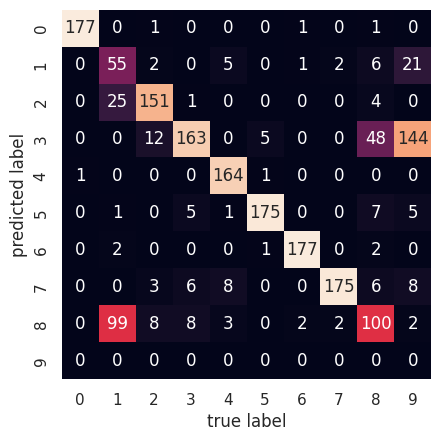

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Penjelasan:   
'heatamap'untuk membandingkan label target asli (digits.target) dengan label yang diprediksi (labels). Kemudian, matriks divisualisasikan menggunakan heatmap dari Seaborn, menampilkan jumlah prediksi yang benar dan salah untuk setiap label dengan anotasi, serta memberi label pada sumbu x (label asli) dan sumbu y (label prediksi).

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9415692821368948

Penjelasan:
1. Menggunakan t-SNE untuk mereduksi dimensi data digits.data menjadi 2 dimensi (digits_proj).
2. Menerapkan K-Means untuk mengelompokkan data yang telah direduksi menjadi 10 cluster.
3. Menghitung label yang diprediksi dengan mencari modus label target asli untuk setiap cluster.
4. Menghitung dan mengembalikan akurasi dari prediksi label dibandingkan dengan label target asli menggunakan accuracy_score.

### Studi Kasus 2: Kompresi Citra

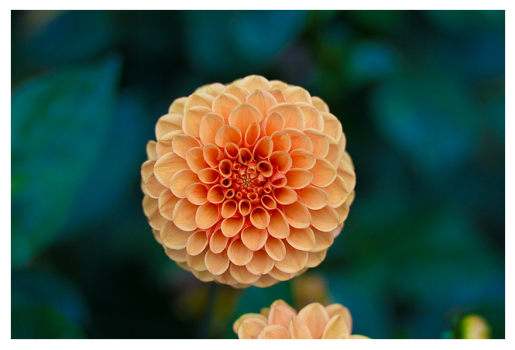

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [ ]:
flower.shape

(427, 640, 3)

Penjelasan:
Menghitung jumlah baris, jumlah kolom, dan menujukkan ukuran dari data yang disimpan dalam variabel 'flower'.

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Penjelasan:
Untuk menormalkan data flower dan mengubahnya menjadi array 2D dengan dimensi (273280, 3), mewakili jumlah pixel dan warna RGB.

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

Penjelasan:   
'plot_pixels' berfungsi untuk memvisualisasikan data pixel dalam dua scatter plot untuk komponen warna merah-hijau dan merah-biru, dengan memilih subset acak dari data dan mengatur label serta batas sumbu.

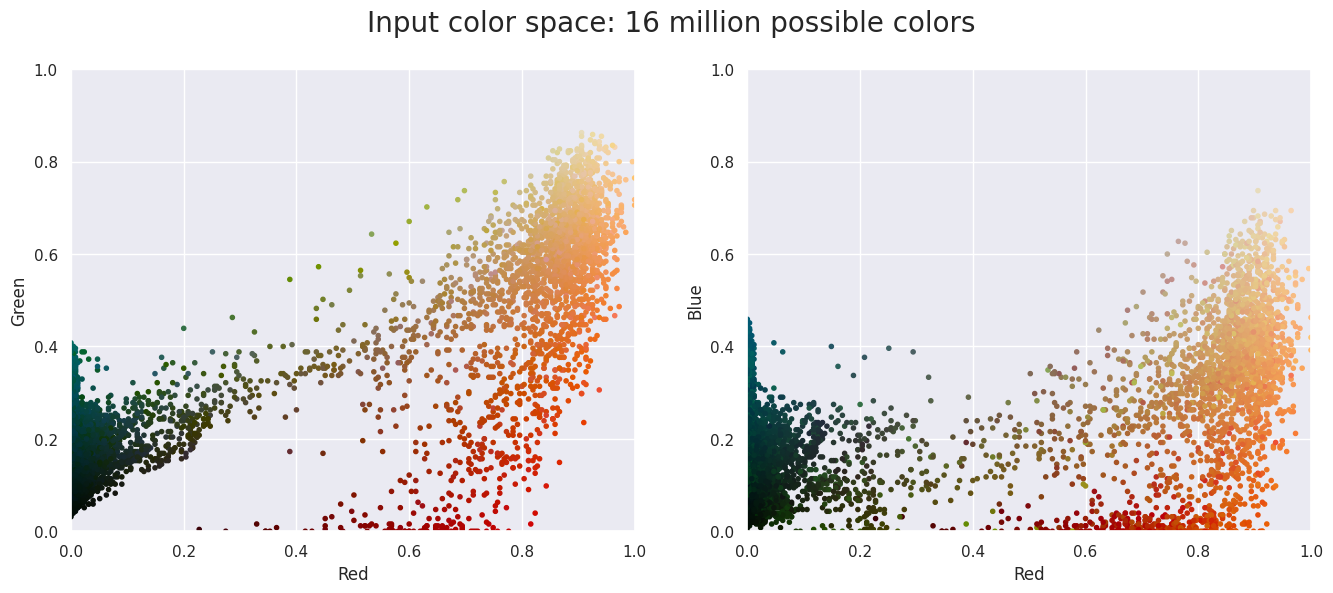

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

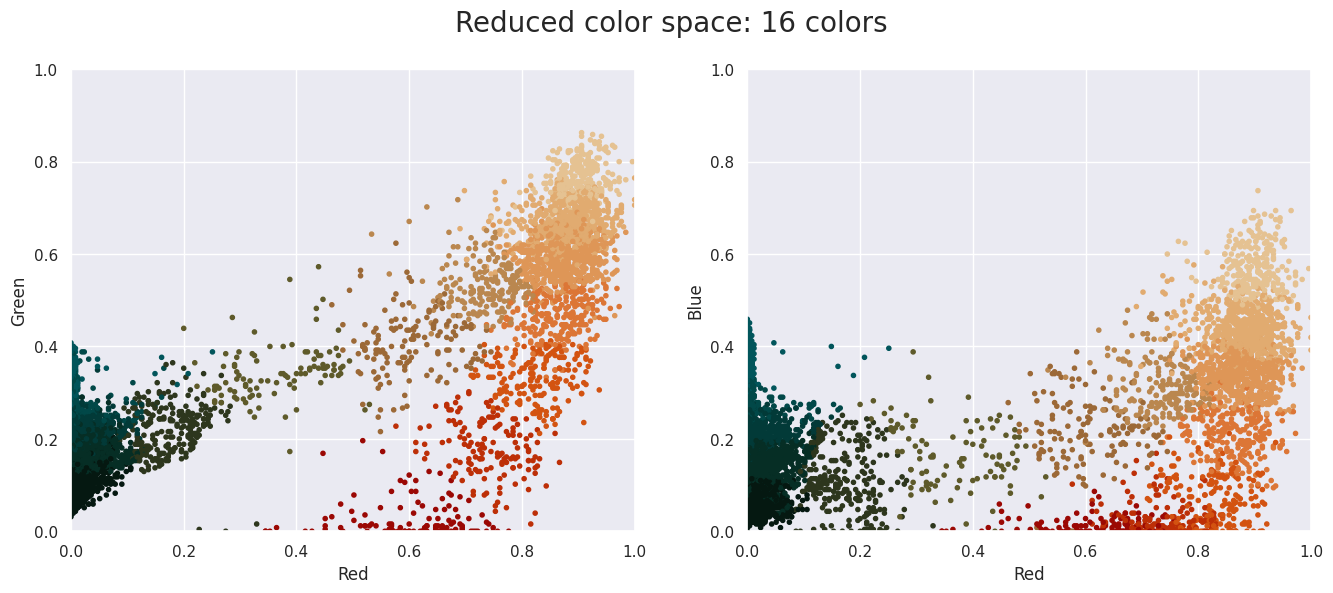

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

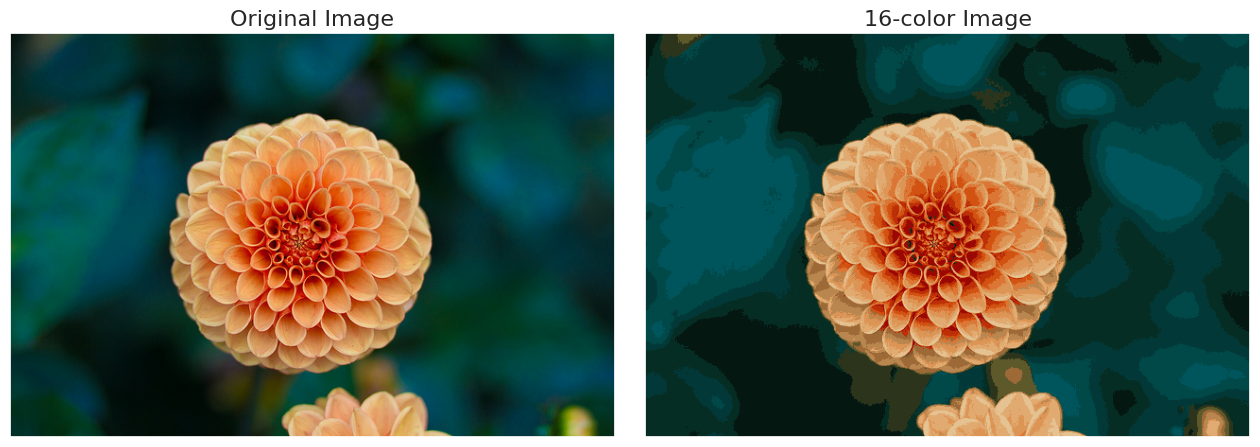

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

Penjelasan:   
Menghasilkan dua gambar dalam subplot: gambar asli (flower) dan gambar yang diwarnai ulang menggunakan 16 warna baru (flower_recolored).

## Praktikum 3

In [ ]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving iris.csv to iris (1).csv


In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=bba00f4c8dd01f1c67d62d1561f8028016da3b8f42439c6f785a52e52615718c
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

In [ ]:
# Normalisasi data
data = data / data.max(axis=0)

In [ ]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

In [ ]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

In [ ]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

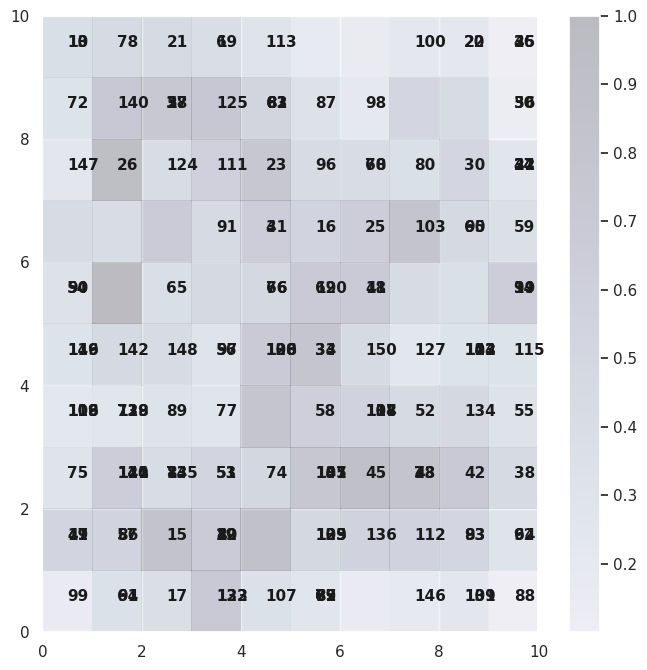

In [ ]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

Penjelasan:   
Berfungsi untuk memvisualisasikan hasil Self-Organizing Map (SOM):  
1. Menampilkan teks: Menempatkan nomor setiap sampel di posisi pemenang (winner) di dalam peta SOM.  
2. Menggambar peta jarak: Menggunakan pcolor untuk menampilkan peta jarak antar neuron SOM, dengan skema warna bone_r dan transparansi 20%.
3. Menampilkan colorbar: Menambahkan colorbar untuk menunjukkan skala jarak.

## Praktikum 4

In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=941968f1b9fed0381f66caa3d055c3ceb5da10ff2fd7212876c9bdeef401430e
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Lenna.png to Lenna.png


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [ ]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [ ]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [ ]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [ ]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [ ]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
Lenna_path = "Lenna.png"
Lenna = io.imread(Lenna_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

In [ ]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

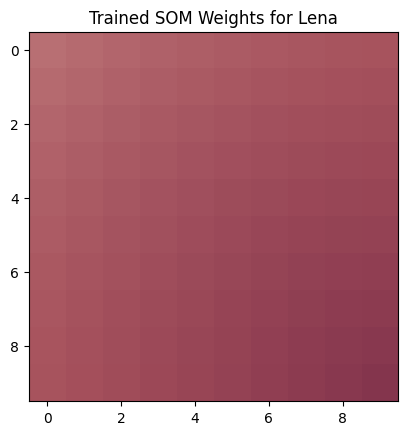

In [ ]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()

## Tugas Praktikum

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Lenna.png to Lenna.png


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the data
data = pd.read_csv('Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Fitur :   
1. Annual Income (k$)
2. Spending Score (1-100)

In [5]:
# Select features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Penjelasan:   
1. Select Fitur: Mengambil dua kolom dari DataFrame data, yaitu Annual Income (k$) dan Spending Score (1-100), dan menyimpannya dalam variabel X sebagai array NumPy.

2. Standardize Features: Menggunakan StandardScaler untuk menstandarisasi fitur dalam X, yang mengubah data sehingga memiliki rata-rata 0 dan deviasi standar 1, dan hasilnya disimpan dalam X_scaled.

In [6]:
# Elbow method to find the optimal number of clusters
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

Penjelasan:   
Menggunakan Metode Elbow untuk mencari jumlah cluster optimal dalam KMeans dengan menghitung dan menyimpan nilai inertia untuk rentang 1 hingga 10 cluster dari data yang sudah distandarisasi.


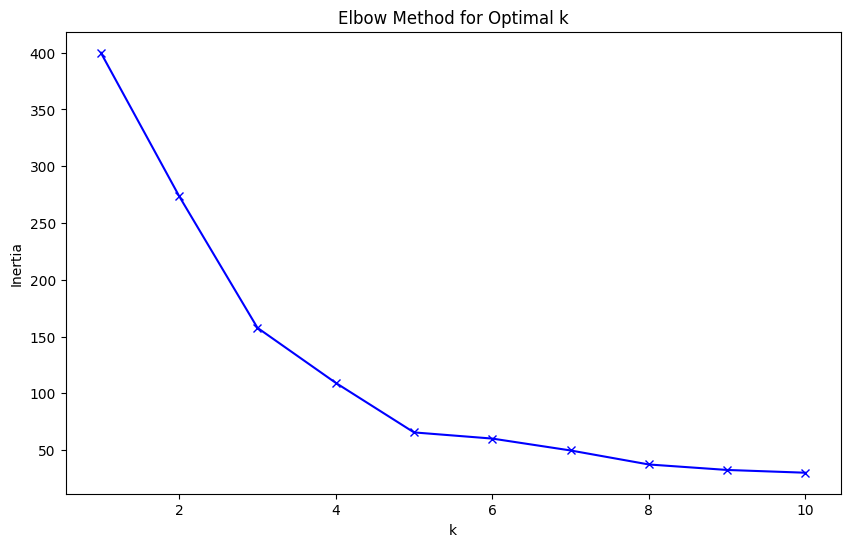

In [7]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Penjelasan:   
Gambar menunjukkan Elbow Method untuk menentukan jumlah klaster optimal dalam K-means. Titik "elbow" (sekitar k=3 atau k=4) menunjukkan klaster optimal, di mana penurunan inertia mulai melambat.

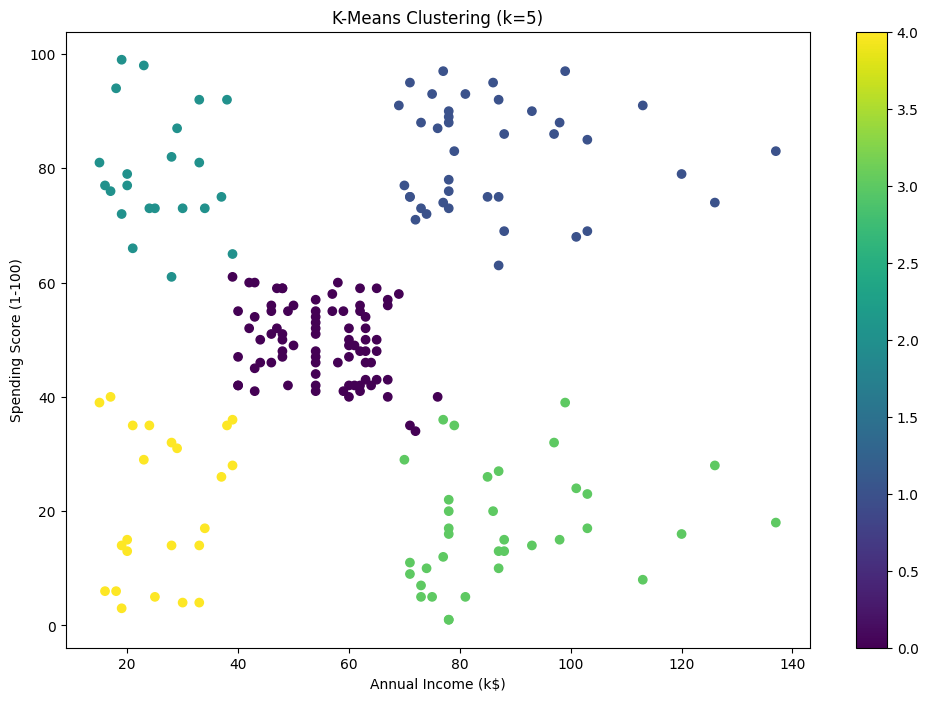

Cluster 1 center: Annual Income = 55.30, Spending Score = 49.52
Cluster 2 center: Annual Income = 86.54, Spending Score = 82.13
Cluster 3 center: Annual Income = 25.73, Spending Score = 79.36
Cluster 4 center: Annual Income = 88.20, Spending Score = 17.11
Cluster 5 center: Annual Income = 26.30, Spending Score = 20.91


In [8]:
# Choose the optimal k (let's say it's 5 for this example)
optimal_k = 5

# Apply K-Means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.colorbar(scatter)
plt.show()

# Print cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1} center: Annual Income = {center[0]:.2f}, Spending Score = {center[1]:.2f}")

Penjelasan:   
Hasil klasterisasi K-Means clustering divisualisasikan dengan grafik 2D, di mana tiap titik diberi warna berdasarkan klasternya dan pusat klaster ditampilkan untuk menunjukkan rata-rata nilai pendapatan dan skor belanja di setiap klaster. Gambar menunjukkan pengelompokan pelanggan ke dalam lima klaster yang berbeda.

### Membuat Implementasi Model SOM untuk segmentasi citra lain:

In [15]:
!pip install MiniSom # Install the MiniSom package

import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom # Now you can import MiniSom after installing the package
from sklearn.preprocessing import MinMaxScaler
from PIL import Image

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=e862e5a3272ed2cc7b552aefb6ba2eae2c99082f41b7ef00fc0fc115d42d05ac
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built MiniSom


In [16]:
from sklearn.datasets import load_sample_image
image = load_sample_image("flower.jpg")
pixels = np.array(image)
original_shape = pixels.shape[:2]  # Save the original shape
pixels = pixels.reshape(-1, 3)  # Reshape to 2D array of pixels

Penjelasan:   
Memuat gambar "flower.jpg" menjadi array NumPy, menyimpan bentuk aslinya, dan mengubah array menjadi bentuk 2D di setiap baris mewakili satu pixel dengan nilai warna RGB.

In [17]:
# Normalize pixel values
scaler = MinMaxScaler()
pixels_normalized = scaler.fit_transform(pixels)

Penjelasan:   
Berfungsi untuk menormalkan nilai pixel gambar ke rentang [0, 1] menggunakan MinMaxScaler dan menyimpannya dalam variabel pixels_normalized.

In [18]:
# Create and train SOM
som_shape = (10, 10)  # You can adjust the size of the SOM
som = MiniSom(som_shape[0], som_shape[1], 3, sigma=1.0, learning_rate=0.5)
som.train_random(pixels_normalized, 10000)  # Train for 10000 iterations

Penjelasan:   
Menggunakan Model SOM (Self-Organizing Map) untuk membuat dan melatih objek MiniSom berukuran 10x10 neuron dengan data pixel yang dinormalisasi selama 10.000 iterasi.

In [19]:
# Get the winner neuron for each pixel
winner_coordinates = np.array([som.winner(p) for p in pixels_normalized]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

Penjelasan:     
Berfungsi untuk menentukan neuron pemenang pada setiap pixel yang dinormalisasi dan menghitung indeks cluster satu dimensi berdasarkan koordinat pemenang dalam Self-Organizing Map (SOM).

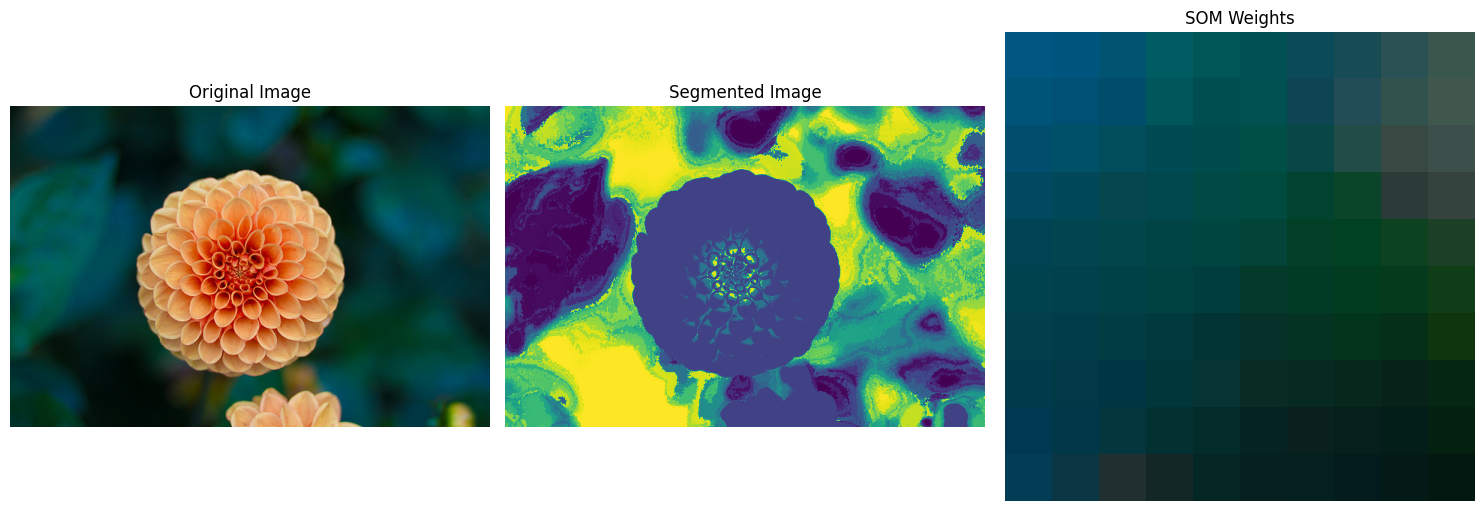

In [20]:
# Reshape cluster_index back to the image shape
segmented = cluster_index.reshape(original_shape)

# Visualize the results
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(segmented, cmap='viridis')
plt.title('Segmented Image')
plt.axis('off')

# Visualize SOM
plt.subplot(133)
plt.imshow(som.get_weights(), interpolation='nearest')
plt.title('SOM Weights')
plt.axis('off')

plt.tight_layout()
plt.show()

Penjelasan:   
Untuk mengubah indeks cluster hasil segmentasi kembali ke bentuk gambar asli dan memvisualisasikan tiga subplot: gambar asli, gambar tersegmentasi dengan skema warna viridis, dan bobot Self-Organizing Map (SOM).